<a href="https://colab.research.google.com/github/lazy-bro/Boom_Models/blob/main/tip_dataset_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


<Axes: xlabel='total_bill', ylabel='Count'>

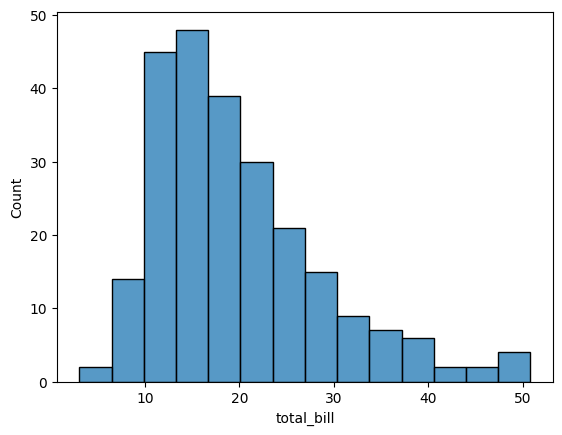

In [ ]:
sns.histplot(data=df, x='total_bill')

<Axes: >

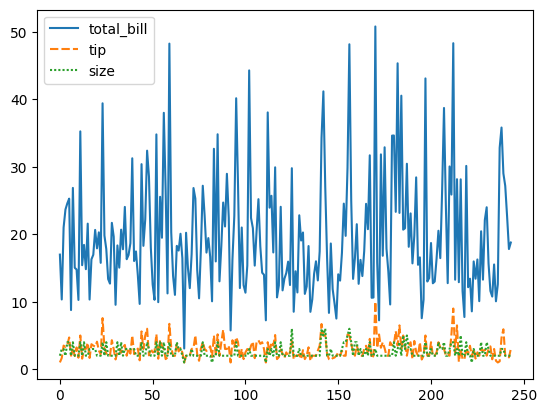

In [ ]:
sns.lineplot(data=df)

<Axes: xlabel='tip', ylabel='total_bill'>

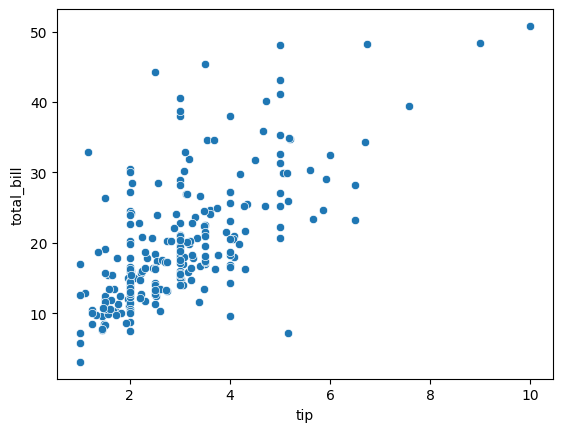

In [ ]:
sns.scatterplot(data=df, x='tip', y='total_bill')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [ ]:
df['smoker']=le.fit_transform(df['smoker'])
df['sex']=le.fit_transform(df['sex'])
df['day']=le.fit_transform(df['day'])
df['time']=le.fit_transform(df['time'])

In [ ]:
df.shape

(244, 7)

In [ ]:
x=df.drop('total_bill', axis=1)
y=df[['total_bill']]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)
y = sc.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [ ]:
X_test.shape

(61, 6)

In [ ]:
X_train.shape

(183, 6)

In [ ]:
Y_test.shape

(61, 1)

In [ ]:
Y_train.shape

(183, 1)

In [ ]:
import keras
from keras import layers
from keras import ops

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(6,)))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer= "adam",
    loss="mse",
    metrics=['mse']
)

In [ ]:
model.fit(
    x=X_train,
    y=Y_train,
    batch_size=32,
    epochs=10,
    verbose="auto",
    validation_data=(X_test, Y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 1.3348 - mse: 1.3348 - val_loss: 1.3668 - val_mse: 1.3668
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1873 - mse: 1.1873 - val_loss: 1.2384 - val_mse: 1.2384
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0237 - mse: 1.0237 - val_loss: 1.1302 - val_mse: 1.1302
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0655 - mse: 1.0655 - val_loss: 1.0386 - val_mse: 1.0386
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9376 - mse: 0.9376 - val_loss: 0.9620 - val_mse: 0.9620
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9038 - mse: 0.9038 - val_loss: 0.8984 - val_mse: 0.8984
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8562 - mse: 0.8562 - val_loss: 0.8442 - val_mse: 0.8442
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8319 - mse: 0.8319 - val_loss: 0.7998 - val_mse: 0.7998
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7128 - mse: 0.7128 -

In [ ]:
model.evaluate(
    x=X_test,
    y=Y_test,
    batch_size=32,
    verbose="auto")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7741 - mse: 0.7741


[0.7312091588973999, 0.7312091588973999]

In [ ]:
y_pred = model.predict(
    X_test,
    batch_size=32,
    verbose='auto')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [ ]:
y_pred

array([[ 0.16544537],
       [-0.25761807],
       [ 0.04328015],
       [ 0.2592006 ],
       [-0.17022386],
       [-0.31124577],
       [-0.42366472],
       [ 0.06682467],
       [-0.08836326],
       [ 0.08791316],
       [-0.12037374],
       [-0.03112054],
       [-0.11018375],
       [-0.31124577],
       [-0.7189805 ],
       [ 0.40485117],
       [ 0.26267073],
       [ 0.05767441],
       [-0.19412874],
       [ 0.66969997],
       [ 0.1618383 ],
       [ 0.06376658],
       [ 0.02586379],
       [-0.03346289],
       [-0.13109465],
       [-0.40933022],
       [-0.2770917 ],
       [ 0.14154795],
       [ 0.04328015],
       [ 0.32403657],
       [ 0.03746113],
       [-0.11547384],
       [ 0.07235546],
       [ 0.11948368],
       [ 0.09757531],
       [ 0.76168436],
       [ 0.11748388],
       [ 1.1186666 ],
       [ 0.10515779],
       [-0.08983615],
       [-0.05688623],
       [-0.02242473],
       [-0.1830029 ],
       [ 0.0230487 ],
       [-0.38264033],
       [-0

In [ ]:
original = sc.inverse_transform(y_pred)

In [ ]:
original

array([[21.255785],
       [17.497225],
       [20.17045 ],
       [22.08872 ],
       [18.273647],
       [17.020788],
       [16.022041],
       [20.379623],
       [19.00091 ],
       [20.566977],
       [18.716524],
       [19.509462],
       [18.807055],
       [17.020788],
       [13.398412],
       [23.382702],
       [22.119549],
       [20.29833 ],
       [18.061274],
       [25.735659],
       [21.223738],
       [20.352455],
       [20.01572 ],
       [19.488653],
       [18.621279],
       [16.149391],
       [17.324219],
       [21.043476],
       [20.17045 ],
       [22.664732],
       [20.118753],
       [18.760056],
       [20.428759],
       [20.847454],
       [20.652817],
       [26.552862],
       [20.829687],
       [29.724346],
       [20.72018 ],
       [18.987825],
       [19.280558],
       [19.586718],
       [18.160118],
       [19.990711],
       [16.386509],
       [14.180009],
       [17.893625],
       [18.574148],
       [15.712355],
       [20.81007 ],
